学习和使用朴素贝叶斯网络

学习教材4.6,4.7内容，调试运行相关代码

查阅scikit-learn工具包中朴素贝叶斯相关代码

完成作业1

## 贝叶斯分类基本原理

### 贝叶斯定理：

条件概率公式

$$
P(A|B) = \dfrac{P(AB)}{P(B)}
$$


贝叶斯定理

$$
P(B_i|A)=\dfrac{P(A|B_i)P(B_i)}{\sum\limits_j P(A|B_j)P(B_j)}
$$

假设有N种可能的类别标记$\{c_1,c_2,...,c_N\}$，$P(c_i|\textbf{x})$，将样本x标记为$c_i$的后验概率
$$
P(c|\textbf{x})=\dfrac{P(\textbf{x},c)}{P(\textbf{x})}=\dfrac{P(c)P(\textbf{x}|c)}{P(\textbf{x})} \tag{a1}
$$


### 朴素贝叶斯

朴素贝叶斯分类器采用了**“属性条件独立性假设”**：对已知类别，假设所有属性相互独立（每个属性独立地对分类结果发生影响）

$$
P(c|\textbf{x})=\dfrac{P(c)P(\textbf{x}|c)}{P(\textbf{x})} = \dfrac{P(c)}{P(\textbf{x})}\prod\limits_{i=1}^d P(x_i|c)
$$

### 训练方法

* 基于训练集$D$估计类先验概率$P(c)$并为每个特征估计条件概率$P(x_i|c)$
* 类先验概率$P(c)=\dfrac{|D_c|}{|D|}$
* 若为**离散**特征$P(x_i|c)=\dfrac{|D_{c,x_i}|}{|D|}$（计数统计）
* 若为**连续**特征：考虑概率密度函数，如正态分布

$$
P(x_i|c)=\dfrac{1}{\sqrt{2\pi}\sigma_{c,i}} exp \left(-\dfrac{(x_i-\mu_{c,i})^2}{2\sigma_{c,i}^2}\right)
$$

### Laplace修正
$$
\begin{align}
\hat{P}(c)&=\dfrac{|D_c|+1}{|D|+N} \\
\hat{P}(x_i,c)&=\dfrac{|D_{c,x_i}|+1}{|D|+N} \tag{a2}
\end{align}
$$
N表示训练集中可能的类别数，$N_i$表示第i个属性可能的取值数。

# 朴素贝叶斯模型构建

## 数据加载与向量化

In [13]:
import numpy as np

In [1]:
def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],       #切分的词条
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]#类别标签向量，1代表侮辱性词汇，0代表不是
    return postingList,classVec

# 函数说明:将切分的实验样本词条整理成不重复的词条列表，也就是词汇表
def createVocabList(dataSet):
    vocabSet = set([])                      #创建一个空的不重复列表
    for document in dataSet:
        vocabSet = vocabSet | set(document) #取并集
    return list(vocabSet)

# 函数说明:根据vocabList词汇表，将inputSet向量化，向量的每个元素为1或0
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList)                               #创建一个其中所含元素都为0的向量
    for word in inputSet:                                          #遍历每个词条
        if word in vocabList:                                      #如果词条存在于词汇表中，则置1
            returnVec[vocabList.index(word)] = 1
        else: print("the word: %s is not in my Vocabulary!" % word)
    return returnVec                                               #返回文档向量

In [9]:
postingList, classVec = loadDataSet()
print('postingList:');display(postingList)
myVocabList = createVocabList(postingList)
print('\nmyVocabList:\n',myVocabList,len(myVocabList))
trainMat = []
for postinDoc in postingList:
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
print('\ntrainMat:', trainMat)

postingList:


[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]


myVocabList:
 ['I', 'so', 'love', 'cute', 'my', 'please', 'to', 'mr', 'quit', 'park', 'take', 'stop', 'not', 'steak', 'posting', 'has', 'garbage', 'dog', 'is', 'maybe', 'worthless', 'buying', 'how', 'food', 'him', 'licks', 'ate', 'dalmation', 'flea', 'help', 'stupid', 'problems'] 32

trainMat: [[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]]


## 朴素贝叶斯模型训练

对照`式a1`,$\textbf{x}$即为一个向量$(x_1,x_2,...,x_{32})$，长度与词个数相同。

根据独立性假设，所有词相互独立。训练朴素贝叶斯模型的基本算法如下：


> * 计算每个类别种文档数目
> * 对每篇训练文档
>   * 对每个类别：
>     * 如果词条出现在文档中→增加该词条的计数值
>     * 增加所有词条的计数值
>   * 对每个类别：
>     * 对每个词条：
>       * 将该词条的数目除以总词条数目得到条件概率
>   * 返回每个类别的条件概率

### 训练模型

In [10]:
'''
Parameters:
    trainMatrix - 训练文档矩阵，即setOfWords2Vec返回的returnVec构成的矩阵
    trainCategory - 训练类别标签向量，即loadDataSet返回的classVec
Returns:
    p0Vect - 侮辱类的条件概率数组
    p1Vect - 非侮辱类的条件概率数组
    pAbusive - 文档属于侮辱类的概率
'''
# 函数说明:朴素贝叶斯分类器训练函数
def trainNB0(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)                       #计算训练的文档数目
    numWords = len(trainMatrix[0])                        #计算词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)     #文档属于侮辱类的概率
    p0Num = np.zeros(numWords); p1Num = np.zeros(numWords)#创建numpy.zeros数组,词条出现数初始化为0
    p0Denom = 0.0; p1Denom = 0.0    #分母初始化为0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:   #统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i]) ## 当前文档词数
        else:                      #统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = p1Num/p1Denom
    p0Vect = p0Num/p0Denom
    return p0Vect,p1Vect,pAbusive#返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率


In [14]:
trainMat = []
for postinDoc in postingList:
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
p0V, p1V, pAb = trainNB0(trainMat, classVec)
print('p0V:\n', p0V)
print('p1V:\n', p1V)
print('classVec:\n', classVec)
print('pAb:\n', pAb)

p0V:
 [0.04166667 0.04166667 0.04166667 0.04166667 0.125      0.04166667
 0.04166667 0.04166667 0.         0.         0.         0.04166667
 0.         0.04166667 0.         0.04166667 0.         0.04166667
 0.04166667 0.         0.         0.         0.04166667 0.
 0.08333333 0.04166667 0.04166667 0.04166667 0.04166667 0.04166667
 0.         0.04166667]
p1V:
 [0.         0.         0.         0.         0.         0.
 0.05263158 0.         0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.         0.05263158 0.         0.05263158 0.10526316
 0.         0.05263158 0.10526316 0.05263158 0.         0.05263158
 0.05263158 0.         0.         0.         0.         0.
 0.15789474 0.        ]
classVec:
 [0, 1, 0, 1, 0, 1]
pAb:
 0.5


### 平滑修改模型

在刚才的矩阵种发现了有概率值为0的情况，这会导致连乘积为0.

为减少此影响，可以用`式a2`进行平滑，初始分子置1，分母N取2.

另外，在程序运行过程中，由于太多较小小数相乘，程序可能会下溢，所以可以使用对数进行放缩。

In [15]:
def trainNB1(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)                       #计算训练的文档数目
    numWords = len(trainMatrix[0])                        #计算词条数
    pAbusive = sum(trainCategory)/float(numTrainDocs)     #文档属于侮辱类的概率
#     p0Num = np.zeros(numWords); p1Num = np.zeros(numWords)#创建numpy.zeros数组,词条出现数初始化为0
    p0Num = np.ones(numWords); p1Num = np.ones(numWords)#创建numpy.ONES数组,词条出现数初始化为1
#     p0Denom = 0.0; p1Denom = 0.0    #分母初始化为0
    p0Denom = 2.0; p1Denom = 2.0    #分母初始化
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:   #统计属于侮辱类的条件概率所需的数据，即P(w0|1),P(w1|1),P(w2|1)···
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i]) ## 当前文档词数
        else:                      #统计属于非侮辱类的条件概率所需的数据，即P(w0|0),P(w1|0),P(w2|0)···
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = log(p1Num/p1Denom)
    p0Vect = log(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive#返回属于侮辱类的条件概率数组，属于非侮辱类的条件概率数组，文档属于侮辱类的概率

## 测试模型



In [16]:
'''
Parameters:
    vec2Classify - 待分类的词条数组
    p0Vec - 侮辱类的条件概率数组
    p1Vec -非侮辱类的条件概率数组
    pClass1 - 文档属于侮辱类的概率
Returns:
    0 - 属于非侮辱类
    1 - 属于侮辱类
'''
# 函数说明:朴素贝叶斯分类器分类函数
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)      #element-wise mult
    p0 = sum(vec2Classify * p0Vec) + log(1.0 - pClass1)
    if p1 > p0:
        return 1
    else: 
        return 0

# 函数说明:朴素贝叶斯分类器测试函数
def testingNB():
    listOPosts,listClasses = loadDataSet()
    myVocabList = createVocabList(listOPosts)
    trainMat=[]
    for postinDoc in listOPosts:
        trainMat.append(setOfWords2Vec(myVocabList, postinDoc))
    p0V,p1V,pAb = trainNB1(np.array(trainMat),np.array(listClasses))
    testEntry = ['love', 'my', 'dalmation']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry = ['stupid', 'garbage']
    thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
    print(testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

In [18]:
from math import log
testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


## 实现词袋模型

原来的模型可以称为“词集模型”，只表现词是否出现；可以考虑“词袋模型”的使用，不仅表现词是否出现，而且表现了词出现的次数。



In [19]:
def bagOfWords2VecMN(vocabList,inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec

# 实战：使用朴素贝叶斯过滤垃圾邮件

In [20]:
# 切分文本
def textParse(bigString):
    import re
    listOfTokens = re.split(r'\W*', bigString)
    return [tok.lower() for tok in listOfTokens if len(tok) > 2] 

In [52]:
def spamTest():
    docList=[]; classList = []; fullText =[]
    for i in range(1,26):
        wordList = textParse(open('./data/email/spam/%d.txt' % i,encoding='utf-8',errors='replace').read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1)
        wordList = textParse(open('./data/email/ham/%d.txt' % i,encoding='utf-8',errors='replace').read())
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList) #构建词表
    trainingSet = list(range(50)); testSet=[] 
    for i in range(10):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(np.array(trainMat),np.array(trainClasses))
    errorCount = 0
    for docIndex in testSet:
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(np.array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
            print("classification error",docList[docIndex])
    print('the error rate is: ',float(errorCount)/len(testSet))

In [55]:
import random

spamTest()
spamTest()
spamTest()

classification error ['will', 'there', 'the', 'latest']
classification error ['yay', 'you', 'both', 'doing', 'fine', 'working', 'mba', 'design', 'strategy', 'cca', 'top', 'art', 'school', 'new', 'program', 'focusing', 'more', 'right', 'brained', 'creative', 'and', 'strategic', 'approach', 'management', 'the', 'way', 'done', 'today']
classification error ['yeah', 'ready', 'may', 'not', 'here', 'because', 'jar', 'jar', 'has', 'plane', 'tickets', 'germany', 'for']
classification error ['linkedin', 'kerry', 'haloney', 'requested', 'add', 'you', 'connection', 'linkedin', 'peter', 'like', 'add', 'you', 'professional', 'network', 'linkedin', 'kerry', 'haloney']
classification error ['ryan', 'whybrew', 'commented', 'your', 'status', 'ryan', 'wrote', 'turd', 'ferguson', 'butt', 'horn']
the error rate is:  0.5
classification error ['oem', 'adobe', 'microsoft', 'softwares', 'fast', 'order', 'and', 'download', 'microsoft', 'office', 'professional', 'plus', '2007', '2010', '129', 'microsoft', 'wind

# 实战：使用朴素贝叶斯分类器从个人广告中获取区域倾向

## 收集数据：导入RSS源……

In [57]:
!pip3 install feedparser

    100% |████████████████████████████████| 81kB 9.3MB/s ta 0:00:011
  Running setup.py install for sgmllib3k ... done


In [58]:
import feedparser
ny = feedparser.parse('http://newyork.craigslist.org/stp/index.rss')

In [60]:
len(ny['entries'])

0

1202年，rss基本无人问津。。。书本提供的两个网站都无法获取新的entry，所以随便找了两个，但是这样搞意义不大了。

In [65]:
hv = feedparser.parse('http://www.hup.harvard.edu/hup_rss.php?new=n')
len(hv['entries'])

223

In [69]:
su = feedparser.parse('https://www.sup.org/rss/?feed=history')
len(su['entries'])

23

In [90]:
def calcMostFreq(vocabList,fullText):
    import operator
    freqDict = {}
    for token in vocabList:
        freqDict[token]=fullText.count(token)
    sortedFreq = sorted(freqDict.items(), key=operator.itemgetter(1), reverse=True) 
    return sortedFreq[:30]       #统计词出现次数，返回排序最高的30个词

def localWords(feed1,feed0):#与spanTest类似
    import feedparser
    docList=[]; classList = []; fullText =[]
    minLen = min(len(feed1['entries']),len(feed0['entries']))
    for i in range(minLen):
        wordList = textParse(feed1['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(1) #NY is class 1
        wordList = textParse(feed0['entries'][i]['summary'])
        docList.append(wordList)
        fullText.extend(wordList)
        classList.append(0)
    vocabList = createVocabList(docList)#create vocabulary
    #作用：移除高频词。尝试注释掉下面三行代码，观察模型表现效果
    top30Words = calcMostFreq(vocabList,fullText)   #remove top 30 words
    for pairW in top30Words:
        if pairW[0] in vocabList: vocabList.remove(pairW[0])
    trainingSet = list(range(2*minLen)); testSet=[]           #create test set
    for i in range(20):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(trainingSet[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:#train the classifier (get probs) trainNB0
        trainMat.append(bagOfWords2VecMN(vocabList, docList[docIndex]))
        trainClasses.append(classList[docIndex])
    p0V,p1V,pSpam = trainNB0(np.array(trainMat),np.array(trainClasses))
    errorCount = 0
    for docIndex in testSet:        #classify the remaining items
        wordVector = bagOfWords2VecMN(vocabList, docList[docIndex])
        if classifyNB(np.array(wordVector),p0V,p1V,pSpam) != classList[docIndex]:
            errorCount += 1
    print('the error rate is: ',float(errorCount)/len(testSet))
    return vocabList,p0V,p1V


In [91]:
vocabList,pHV,pSU = localWords(hv,su)

the error rate is:  0.0


👆注释了去除高频词代码

👇未注释代码

In [93]:
vocabList,pHV,pSU = localWords(hv,su)

the error rate is:  0.6


这不是扯淡吗，rss没选好，但是找不到好的rss了。

可改进：通过函数caclMostFreq()改变要移除的单词数目，然后观察错误率的变化情况。

## 分析数据：显示地域相关用词？

In [84]:
def getTopWords(hv,su):
    import operator
    vocabList,p0V,p1V=localWords(hv,su)
    topHV=[]; topSU=[]
    for i in range(len(p0V)):
        if p0V[i] > -6.0 : topSU.append((vocabList[i],p0V[i]))
        if p1V[i] > -6.0 : topHV.append((vocabList[i],p1V[i]))
    sortedSU = sorted(topSU, key=lambda pair: pair[1], reverse=True)
    print("Su**"*10)
    for item in sortedSU:
        print(item[0])
    sortedHV = sorted(topHV, key=lambda pair: pair[1], reverse=True)
    print("HV**"*10)
    for item in sortedHV:
        print(item[0])

In [87]:
getTopWords(hv,su)

the error rate is:  0.3
Su**Su**Su**Su**Su**Su**Su**Su**Su**Su**
german
east
germany
between
about
century
through
religious
western
not
over
jewish
into
islam
most
they
india
arab
under
also
who
dance
life
people
drawing
policy
region
historical
diderot
cultural
democracy
oil
will
which
islamic
political
iraq
yalom
while
middle
social
united
economy
states
palestine
politics
contemporary
such
twentieth
have
europe
enlightenment
origins
memories
letters
communist
work
was
republic
her
city
national
muslim
soviet
were
out
consumer
has
country
offers
concerns
sovereignty
ultimately
economic
own
movements
labor
scenes
lives
babayan
covert
his
marilyn
relations
key
modern
violence
one
around
implications
neoliberal
together
independence
communities
them
lasting
documents
then
home
isfahan
offering
yet
close
ways
friends
conflict
young
those
writing
understanding
well
culture
obscured
west
everyday
did
shared
story
what
influence
study
dancing
provides
cold
hunnicutt
since
wolfe
examines
po

crises
southwest
pro
crow
1938
unparalleled
unified
implemented
9780674247840
primary
millennial
balkan
rely
black
tragedies
chicken
outlook
achievement
imprint
electricity
fascinating
tribal
momentum
subject
nomads
forests
kitromilides
steer
effortlessly
dive
disruption
formations
flow
adaptive
transform
belt
shishuo
makes
ancient
elevating
union
volunteer
civilizations
dissolution
realities
model
use
prose
dissemination
map
idea
educating
forced
taken
authors
electric
imperialism
take
forward
run
adults
craft
fundamental
majority
convention
bearer
infrastructure
challenged
breakthroughs
walt
practice
artifact
event
renowned
combined
larson
markers
humans
eyck
disappointed
behaviors
climate
remembering
here
rehearsal
followers
hand
reconstruction
catch
media
HV**HV**HV**HV**HV**HV**HV**HV**HV**HV**
april
march
rsquo
mdash
today
more
shows
have
women
political
were
black
civil
hill
are
mass
than
redding
story
been
has
gabriel
causes
movement
winant
united
finds
alan
mia
his
working
cen

detail
contested
struggled
mental
whether
revolutions
blood
uncertain
enact
paid
flirt
essential
abandonment
flux
could
narratives
extant
building
assembly
join
obsessive
challenge
rationale
qualities
tribute
developing
archive
gestures
strip
perennial
framework
repeated
understood
plants
belonged
systematic
figures
certain
can
tensions
reconsider
international
saudi
refer
displacement
multinational
integration
wrote
nationalization
biography
biblical
company
motion
thatcher
six
religion
records
suggests
interests
officials
activities
critic
constructed
beaches
neither
think
brandon
conjunctures
infrastructures
profound
streets
medieval
does
reflation
knowledge
dead
blakeley
experienced
goods
populace
delineate
scientific
boundaries
concepts
living
foundations
changing
unlike
regime
over
endemic
result
drawing
activity
reasoning
urges
private
9780674983519
ideas
technologically
nazi
imaginations
partially
containing
seen
picture
emerged
forces
genetic
highly
prejudice
urban
illuminatin

程序输出了大量的停用词，可以考虑移除固定的停用词

# sklearn使用

参考了一个比较全面的sklearn朴素贝叶斯博文：

[使用sklearn学习朴素贝叶斯](https://blog.csdn.net/qq_38163244/article/details/109154089)

https://zhuanlan.zhihu.com/p/30745924

In [94]:
from sklearn.datasets import fetch_20newsgroups
news=fetch_20newsgroups(subset='all')
print (len(news.data))
print (news.data[0])

KeyboardInterrupt: 

In [ ]:
#20类新闻文本数据分割
#从sklearn.cross_validation导入train_test_split
from sklearn.cross_validation import train_test_split
#随机采样25%的数据样本作为测试集
X_train,X_test,y_train,y_test=train_test_split(news.data,news.target,
                                               test_size=0.25,random_state=33)

In [ ]:
#使用朴素贝叶斯分类器对新闻文本数据进行类别预测
#从sklearn.feature_extraction.text里导入用于文本特征向量转化模块。
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

#sklearn.naive_bayes里导入朴素贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
#使用默认配置初始化朴素贝叶斯模型
mnb=MultinomialNB()
#利用训练数据对模型参数进行估计
mnb.fit(X_train,y_train)
#对测试样本进行类别预测，结果存储在变量y_predict中
y_predict=mnb.predict(X_test)

In [ ]:
#对朴素贝叶斯分类器在新闻文本数据上的表现性能进行评估
#从sklearn.metrics里导入classification_report用于详细的分类性能报告
from sklearn.metrics import classification_report
print ('The accuracy of Naive Bayes Classifier is',mnb.score(X_test,y_test))
print(classification_report(y_test,y_predict,target_name=news.target_names))

# 作业1：使用朴素贝叶斯预测电脑销售

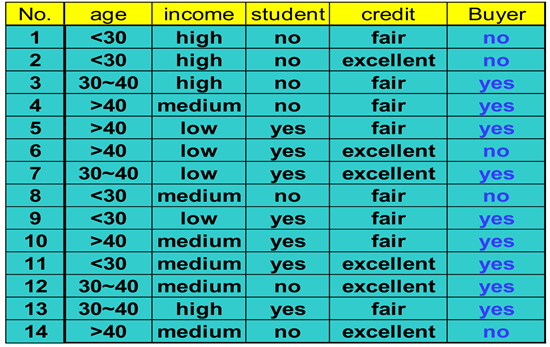

`age`,`income`,`student`,`credit`均为离散型特征，所以可以使用计数计算概率值。

使用朴素贝叶斯，假设所有属性相互独立。

`age`取值：<30, 30-40, >40

`income`取值：low, medium, high

`student`取值：yes, no

`credit`取值：fair, excellent.

$$
\begin{align}
P(Yes) &= \dfrac{9}{14} \\
P(No) &= \dfrac{5}{14} \\
P(age \lt 30 | Yes) &= \dfrac{2}{5} \\
P(age \lt 30 | No) &= \dfrac{3}{5} \\
P(30 \le age \le 40 | Yes) &= \dfrac{4}{4} =  1 \\
P(30 \le age \le 40 | No) &= 0 \\
P(age \gt 40 | Yes) &= \dfrac{3}{5} \\
P(age \gt 40 | No) &= \dfrac{2}{5} \\
P(income=low|Yes) &= \dfrac{3}{4} \\
P(income=low|No) &= \dfrac{1}{4} \\
P(income=medium|Yes) &= \dfrac{4}{6} = \dfrac{2}{3} \\
P(income=medium|No) &= \dfrac{2}{6} = \dfrac{1}{3} \\
P(income=high|Yes) &= \dfrac{2}{4} = \dfrac{1}{2} \\
P(income=high|No) &= \dfrac{2}{4} = \dfrac{1}{2} \\
P(student=no|Yes) &= \dfrac{3}{7} \\
P(student=no|No) &= \dfrac{4}{7} \\
P(student=yes|Yes) &= \dfrac{6}{7} \\
P(student=yes|No) &= \dfrac{1}{7} \\
P(credit=fair|Yes) &= \dfrac{6}{8} = \dfrac{3}{4} \\
P(credit=fair|No) &= \dfrac{2}{8} = \dfrac{1}{4} \\
P(creait=excellent|Yes) &= \dfrac{3}{6} = \dfrac{1}{2} \\
P(creait=excellent|No) &= \dfrac{3}{6} = \dfrac{1}{2} \\
\end{align}
$$

$p(criteria|No) = 1-p(criteria|Yes)$;

$p(\textbf{x}|Yes)=p(YES)\prod\limits_{x_i \in \textbf{x}} p(x_i|Yes)$

| age   | p(AGE\|yes) | p(AGE\|no) | income | p(INCOME\|yes) | p(INCOME\|no) | student | p(STUDENT\|yes) | p(STUDENT\|no) | credit    | p(CREDIT\|yes) | p(CREDIT\|no) | p(yes) | p(no) | p(x\|yes) | p(x\|no) | result |
| ----- | ----------- | ---------- | ------ | -------------- | ------------- | ------- | --------------- | -------------- | --------- | -------------- | ------------- | ------ | ----- | --------- | -------- | ------ |
| <30   | 2/9         | 3/5        | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.12E-02  | 3.43E-03 | yes    |
| <30   | 2/9         | 3/5        | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.06E-02  | 5.14E-03 | yes    |
| <30   | 2/9         | 3/5        | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.06E-02  | 1.37E-02 | no     |
| <30   | 2/9         | 3/5        | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 5.29E-03  | 2.06E-02 | no     |
| <30   | 2/9         | 3/5        | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.82E-02  | 6.86E-03 | yes    |
| <30   | 2/9         | 3/5        | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.41E-02  | 1.03E-02 | yes    |
| <30   | 2/9         | 3/5        | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.41E-02  | 2.74E-02 | no     |
| <30   | 2/9         | 3/5        | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 7.05E-03  | 4.11E-02 | no     |
| <30   | 2/9         | 3/5        | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.41E-02  | 6.86E-03 | yes    |
| <30   | 2/9         | 3/5        | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 7.05E-03  | 1.03E-02 | no     |
| <30   | 2/9         | 3/5        | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 7.05E-03  | 2.74E-02 | no     |
| <30   | 2/9         | 3/5        | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 3.53E-03  | 4.11E-02 | no     |
| 30~40 | 4/9         | 0.00E+00   | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 4.23E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 2.12E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.12E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.06E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 5.64E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | 4/9         | 0.00E+00   | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 7.05E-03  | 0.00E+00 | yes    |
| >40   | 1/3         | 2/5        | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 3.17E-02  | 2.29E-03 | yes    |
| >40   | 1/3         | 2/5        | low    | 1/3            | 1/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.59E-02  | 3.43E-03 | yes    |
| >40   | 1/3         | 2/5        | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.59E-02  | 9.14E-03 | yes    |
| >40   | 1/3         | 2/5        | low    | 1/3            | 1/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 7.94E-03  | 1.37E-02 | no     |
| >40   | 1/3         | 2/5        | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 4.23E-02  | 4.57E-03 | yes    |
| >40   | 1/3         | 2/5        | medium | 4/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 2.12E-02  | 6.86E-03 | yes    |
| >40   | 1/3         | 2/5        | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.12E-02  | 1.83E-02 | yes    |
| >40   | 1/3         | 2/5        | medium | 4/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.06E-02  | 2.74E-02 | no     |
| >40   | 1/3         | 2/5        | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 2.12E-02  | 4.57E-03 | yes    |
| >40   | 1/3         | 2/5        | high   | 2/9            | 2/5           | yes     | 2/3             | 1/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 1.06E-02  | 6.86E-03 | yes    |
| >40   | 1/3         | 2/5        | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | fair      | 2/3            | 2/5           | 9/14   | 5/14  | 1.06E-02  | 1.83E-02 | no     |
| >40   | 1/3         | 2/5        | high   | 2/9            | 2/5           | no      | 1/3             | 4/5            | excellent | 1/3            | 3/5           | 9/14   | 5/14  | 5.29E-03  | 2.74E-02 | no    |


| age   | income | student | credit    | p(x\|yes) | p(x\|no) | result |
| ----- | ------ | ------- | --------- | --------- | -------- | ------ |
| <30   | low    | yes     | fair      | 2.12E-02  | 3.43E-03 | yes    |
| <30   | low    | yes     | excellent | 1.06E-02  | 5.14E-03 | yes    |
| <30   | low    | no      | fair      | 1.06E-02  | 1.37E-02 | no     |
| <30   | low    | no      | excellent | 5.29E-03  | 2.06E-02 | no     |
| <30   | medium | yes     | fair      | 2.82E-02  | 6.86E-03 | yes    |
| <30   | medium | yes     | excellent | 1.41E-02  | 1.03E-02 | yes    |
| <30   | medium | no      | fair      | 1.41E-02  | 2.74E-02 | no     |
| <30   | medium | no      | excellent | 7.05E-03  | 4.11E-02 | no     |
| <30   | high   | yes     | fair      | 1.41E-02  | 6.86E-03 | yes    |
| <30   | high   | yes     | excellent | 7.05E-03  | 1.03E-02 | no     |
| <30   | high   | no      | fair      | 7.05E-03  | 2.74E-02 | no     |
| <30   | high   | no      | excellent | 3.53E-03  | 4.11E-02 | no     |
| 30~40 | low    | yes     | fair      | 4.23E-02  | 0.00E+00 | yes    |
| 30~40 | low    | yes     | excellent | 2.12E-02  | 0.00E+00 | yes    |
| 30~40 | low    | no      | fair      | 2.12E-02  | 0.00E+00 | yes    |
| 30~40 | low    | no      | excellent | 1.06E-02  | 0.00E+00 | yes    |
| 30~40 | medium | yes     | fair      | 5.64E-02  | 0.00E+00 | yes    |
| 30~40 | medium | yes     | excellent | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | medium | no      | fair      | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | medium | no      | excellent | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | high   | yes     | fair      | 2.82E-02  | 0.00E+00 | yes    |
| 30~40 | high   | yes     | excellent | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | high   | no      | fair      | 1.41E-02  | 0.00E+00 | yes    |
| 30~40 | high   | no      | excellent | 7.05E-03  | 0.00E+00 | yes    |
| >40   | low    | yes     | fair      | 3.17E-02  | 2.29E-03 | yes    |
| >40   | low    | yes     | excellent | 1.59E-02  | 3.43E-03 | yes    |
| >40   | low    | no      | fair      | 1.59E-02  | 9.14E-03 | yes    |
| >40   | low    | no      | excellent | 7.94E-03  | 1.37E-02 | no     |
| >40   | medium | yes     | fair      | 4.23E-02  | 4.57E-03 | yes    |
| >40   | medium | yes     | excellent | 2.12E-02  | 6.86E-03 | yes    |
| >40   | medium | no      | fair      | 2.12E-02  | 1.83E-02 | yes    |
| >40   | medium | no      | excellent | 1.06E-02  | 2.74E-02 | no     |
| >40   | high   | yes     | fair      | 2.12E-02  | 4.57E-03 | yes    |
| >40   | high   | yes     | excellent | 1.06E-02  | 6.86E-03 | yes    |
| >40   | high   | no      | fair      | 1.06E-02  | 1.83E-02 | no     |
| >40   | high   | no      | excellent | 5.29E-03  | 2.74E-02 | no     |